# (Prosper Loan Dataset Exploration)
## by (Ahmad Khaled)

## Preliminary Wrangling

>This Dataset about loans.prosper who help people to take loans by easy way.  This data set contains 113,937 loans with 81 variables on each loan and the link below have what each of these variables mean.
https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# Load dataset
df_org = pd.read_csv('ProsperLoanData.csv')

#to make data easy to read
pd.set_option('display.max_columns', 81)
df_org.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [3]:
df_org.shape

(113937, 81)

In [4]:
#to check if there was any duplicated data
sum(df_org.duplicated())

0

In [5]:
df_org.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
#to check null values
data_miss=df_org.isnull().sum()
#Taking only data with null values
data_miss=data_miss[data_miss>0]
#Sort the data
data_miss.sort_values(ascending=False)

GroupKey                               100596
LoanFirstDefaultedCycleNumber           96985
ScorexChangeAtTimeOfListing             95009
ProsperPrincipalOutstanding             91852
ProsperPrincipalBorrowed                91852
ProsperPaymentsOneMonthPlusLate         91852
ProsperPaymentsLessThanOneMonthLate     91852
OnTimeProsperPayments                   91852
TotalProsperPaymentsBilled              91852
TotalProsperLoans                       91852
CreditGrade                             84984
ClosedDate                              58848
EstimatedReturn                         29084
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
ProsperScore                            29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
DebtToIncomeRatio                        8554
EmploymentStatusDuration                 7625
AmountDelinquent                         7622
BankcardUtilization               

### Due to we want to investigate this dataset and this big number of null values,so i will make a new subset of the data the will use it in my exploration

In [7]:
#Make a list of columns we will drop
col_interest= ['Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)','ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Investors']
#Making subset for variables we need while exploration
df_sub=df_org[col_interest]
df_sub.head()

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Investors
0,36,Completed,0.1580,NaN,0,Self-employed,4.0,3083.333333,NaN,9425,2007-09-12 00:00:00,258
1,36,Current,0.0920,A,2,Employed,0.0,6125.000000,NaN,10000,2014-03-03 00:00:00,1
2,36,Completed,0.2750,NaN,0,Not available,0.0,2083.333333,NaN,3001,2007-01-17 00:00:00,41
3,36,Current,0.0974,A,16,Employed,14.0,2875.000000,NaN,10000,2012-11-01 00:00:00,158
4,36,Current,0.2085,D,2,Employed,0.0,9583.333333,1.0,15000,2013-09-20 00:00:00,20


In [8]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerRate               113937 non-null  float64
 3   ProsperRating (Alpha)      84853 non-null   object 
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   EmploymentStatus           111682 non-null  object 
 6   DelinquenciesLast7Years    112947 non-null  float64
 7   StatedMonthlyIncome        113937 non-null  float64
 8   TotalProsperLoans          22085 non-null   float64
 9   LoanOriginalAmount         113937 non-null  int64  
 10  LoanOriginationDate        113937 non-null  object 
 11  Investors                  113937 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 10.4+ MB


In [9]:
#Find quality issue in loanoriginationdate need to be datatime type
df_sub['LoanOriginationDate'] = pd.to_datetime(df_sub['LoanOriginationDate'])
# To check changes
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Term                       113937 non-null  int64         
 1   LoanStatus                 113937 non-null  object        
 2   BorrowerRate               113937 non-null  float64       
 3   ProsperRating (Alpha)      84853 non-null   object        
 4   ListingCategory (numeric)  113937 non-null  int64         
 5   EmploymentStatus           111682 non-null  object        
 6   DelinquenciesLast7Years    112947 non-null  float64       
 7   StatedMonthlyIncome        113937 non-null  float64       
 8   TotalProsperLoans          22085 non-null   float64       
 9   LoanOriginalAmount         113937 non-null  int64         
 10  LoanOriginationDate        113937 non-null  datetime64[ns]
 11  Investors                  113937 non-null  int64   

<ipython-input-9-d17fa20cfb50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['LoanOriginationDate'] = pd.to_datetime(df_sub['LoanOriginationDate'])


In [10]:
#check null values
df_sub.isnull().sum()

Term                             0
LoanStatus                       0
BorrowerRate                     0
ProsperRating (Alpha)        29084
ListingCategory (numeric)        0
EmploymentStatus              2255
DelinquenciesLast7Years        990
StatedMonthlyIncome              0
TotalProsperLoans            91852
LoanOriginalAmount               0
LoanOriginationDate              0
Investors                        0
dtype: int64

In [11]:
#Drop null values in both columns 'EmploymentStatus','DelinquenciesLast7Years','ProsperRating (Alpha)'
df_sub = df_sub.dropna(subset=['EmploymentStatus','DelinquenciesLast7Years','ProsperRating (Alpha)'])
#Replace all null values in TotalProsperLoans with 0
df_sub['TotalProsperLoans']=df_sub.TotalProsperLoans.fillna(0) 

In [12]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Term                       84853 non-null  int64         
 1   LoanStatus                 84853 non-null  object        
 2   BorrowerRate               84853 non-null  float64       
 3   ProsperRating (Alpha)      84853 non-null  object        
 4   ListingCategory (numeric)  84853 non-null  int64         
 5   EmploymentStatus           84853 non-null  object        
 6   DelinquenciesLast7Years    84853 non-null  float64       
 7   StatedMonthlyIncome        84853 non-null  float64       
 8   TotalProsperLoans          84853 non-null  float64       
 9   LoanOriginalAmount         84853 non-null  int64         
 10  LoanOriginationDate        84853 non-null  datetime64[ns]
 11  Investors                  84853 non-null  int64         
dtypes: 

In [13]:
#Check if there wwas null values overall sub dataset
df_sub.isnull().sum().sum()

0

In [14]:
#Making a copy of dataset ofinterest
df=df_sub.copy()
df.sample(10)

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Investors
101847,60,Current,0.1396,A,1,Employed,0.0,12000.000000,0.0,25000,2012-02-14,178
26404,36,Completed,0.3199,HR,1,Employed,0.0,4833.333333,0.0,4000,2011-05-04,36
59877,60,Current,0.2672,D,1,Employed,0.0,8333.333333,0.0,15000,2013-03-26,196
84938,36,Current,0.2925,E,1,Employed,1.0,5000.000000,0.0,4000,2013-11-22,54
86446,60,Current,0.1520,B,1,Employed,0.0,6191.666667,0.0,15500,2013-09-24,113
37030,36,Chargedoff,0.2747,D,5,Full-time,0.0,833.333333,0.0,1000,2009-11-09,31
68162,36,Current,0.3108,E,7,Employed,0.0,3333.333333,0.0,7500,2011-11-30,80
65287,60,Current,0.1685,C,1,Employed,0.0,3465.666667,0.0,10000,2013-12-17,48
13447,36,Defaulted,0.3177,HR,7,Employed,0.0,4666.666667,0.0,4000,2012-05-25,4
45695,60,Completed,0.1399,B,6,Employed,0.0,2000.000000,1.0,11500,2011-03-11,220


### What is the structure of your dataset?
 - I have dataset conrain from 84853 raws and 12 columns.
- 'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)','ListingCategory (numeric)', 'EmploymentStatus', 'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans','LoanOriginalAmount', 'LoanOriginationDate', 'Investors'

### What is/are the main feature(s) of interest in your dataset?

> I will try to figure out what features can be used to predict 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Until now i think the most important features are:
> - loan amount will play a major role and maybe the category of credit. 
> - Prosper rating will depend on stated income
> - effect of Delinquencies Last 7 Years

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

## 1- check loan status

Text(0, 0.5, 'Counting for each status')

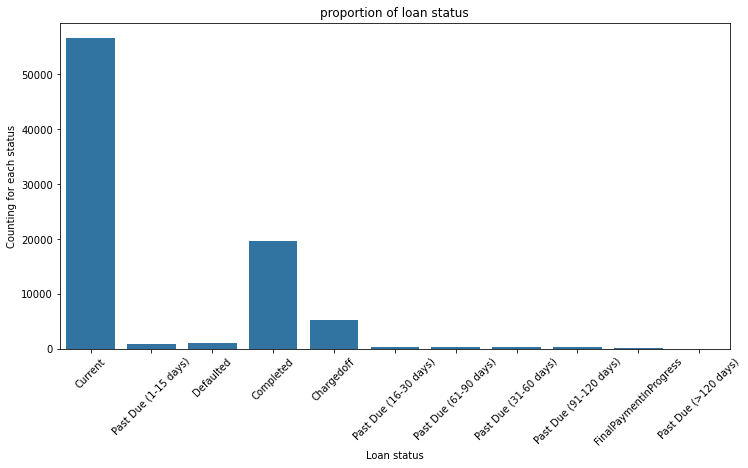

In [28]:
# Making base color for visualization
base_color = sb.color_palette()[0]
#set figure size
plt.figure(figsize=[12,6])

sb.countplot(data=df , x='LoanStatus' , color=base_color);
plt.xticks(rotation=45);
plt.title('proportion of loan status');
plt.xlabel('Loan status');
plt.ylabel('Counting for each status');

In [ ]:
count_status = df.LoanStatus.value_counts();

plt.pie(count_status , labels = count_status.index, startangle = 90, counterclock = False);

In [ ]:
# Just summary to use this percentage in observation
df.LoanStatus.value_counts()/df.LoanStatus.value_counts().sum()

### Conclousion
> - It's about 66.6% of loans have current status
> - 23.1% Loan have completed status

 ### 2- Prospers rating Alpha

In [16]:
# Cause of data(prosper rating alpha) is ordinal data and it sorted from maximum AA to minimum HR
ord_list_alpha = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

Text(0, 0.5, 'Counting for each Rate')

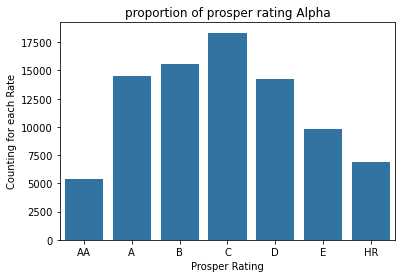

In [29]:
sb.countplot(data=df, x='ProsperRating (Alpha)', color=base_color, order= ord_list_alpha );
plt.title('proportion of prosper rating Alpha');
plt.xlabel('Prosper Rating');
plt.ylabel('Counting for each Rate');

### Observation 
> I realized from above graph that these data is almost normally distirbuted with common value C and minimum values(AA and HR)

### 3- Employment status

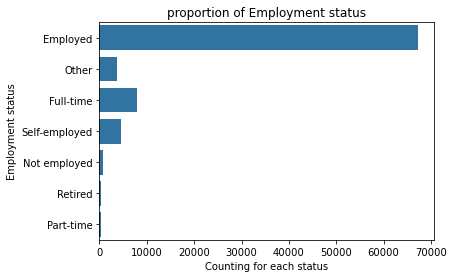

In [31]:
sb.countplot(data= df, y='EmploymentStatus', color=base_color)
plt.title('proportion of Employment status');
plt.ylabel('Employment status');
plt.xlabel('Counting for each status');

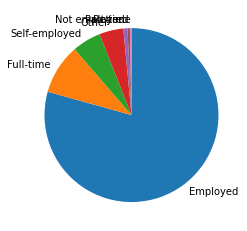

In [19]:
count_status2 = df.EmploymentStatus.value_counts();
plt.pie(count_status2 , labels = count_status2.index, startangle = 90, counterclock = False);

### Conclousion
> - Found high people go to take loans is employed status which represent about 79.3% 

### 3 - Borrower Rate

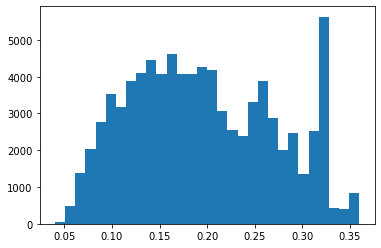

In [20]:

plt.hist(data=df , x='BorrowerRate', color=base_color, bins=30);

In [21]:
df.BorrowerRate.describe()

count    84853.000000
mean         0.196022
std          0.074631
min          0.040000
25%          0.135900
50%          0.187500
75%          0.257400
max          0.360000
Name: BorrowerRate, dtype: float64

### Conclousion
> I realized that Borrower rate is bimodal distirubted and has to peaks first one at 0.16 and second one at 0.32.
>and from statistics above i see that:
> - about 50% of rates is above 0.18
> -  about 75 % of rates is above 0.25
> - The maximum rate was 0.36

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>- I found prosper rating alpha was normaly disturibted.
> -Also i found Borrower rate was bimodal distirbuted

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No i didn't need to do this

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### 1- Relation between prosper rating Alpha and Employment status

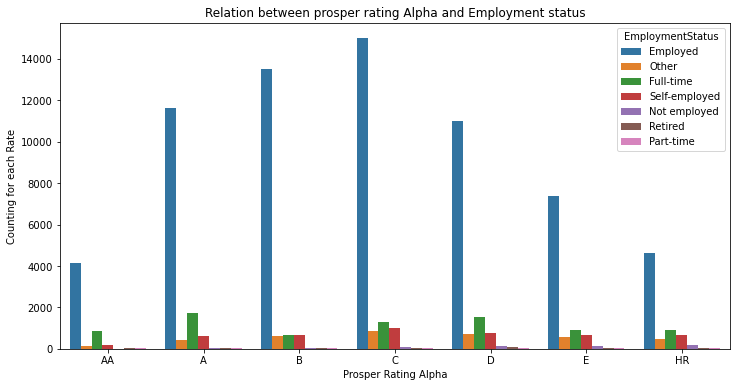

In [32]:
plt.figure(figsize = [12, 6])
sb.countplot(data =df, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', order= ord_list_alpha );
plt.title('Relation between prosper rating Alpha and Employment status');
plt.xlabel('Prosper Rating Alpha');
plt.ylabel('Counting for each Rate');

### Concolusion
> - We found that lower rates have greater proportion with Employment status self-employed, not employed,part Time and Retired
> - But in the other hand there most common status during all rates is Employed status, and in the second Place was Full time status.

### 2- Relation between Prosper Rating Alpha and Delinquencies in Last 7 Years

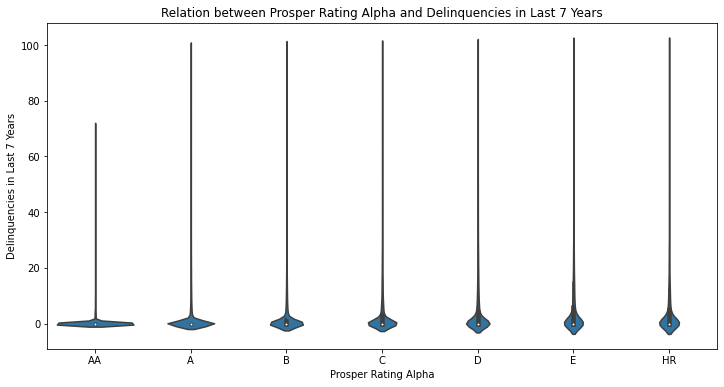

In [33]:
plt.figure(figsize = [12, 6])
sb.violinplot(data =df , x = 'ProsperRating (Alpha)', y = 'DelinquenciesLast7Years', color =base_color,order= ord_list_alpha );
plt.title('Relation between Prosper Rating Alpha and Delinquencies in Last 7 Years');
plt.xlabel('Prosper Rating Alpha');
plt.ylabel('Delinquencies in Last 7 Years');

### Conclousion:
> People with rating AA have delinquencies than other ratings

### 3- Relation between Prosper Rating Alpha and Investors

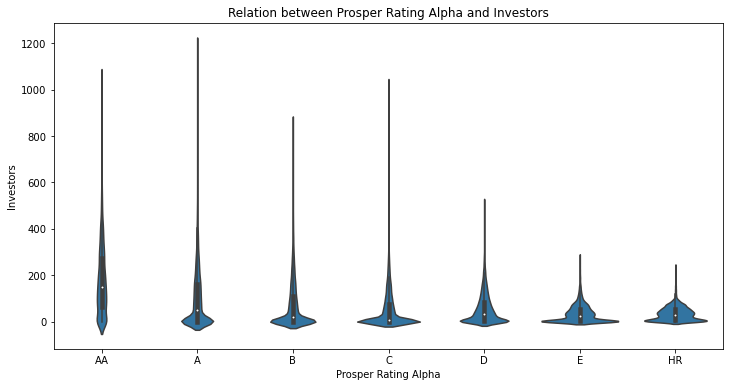

In [34]:
plt.figure(figsize = [12, 6])
sb.violinplot(data = df, x='ProsperRating (Alpha)', y='Investors', color = base_color, order= ord_list_alpha);
plt.title('Relation between Prosper Rating Alpha and Investors');
plt.xlabel('Prosper Rating Alpha');
plt.ylabel('Investors');

### Conclousion
> Borrower People with high rates have more investors

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Borrower rate for individuals with low rating is higher. Employment status of individuals with lower ratings tends to be Not employed, Self-employed, Retired and Part-time.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> From my analysis i observe that the most coom rating was Rate(D)

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### 1-  Relation between rating, loan amount and loan status

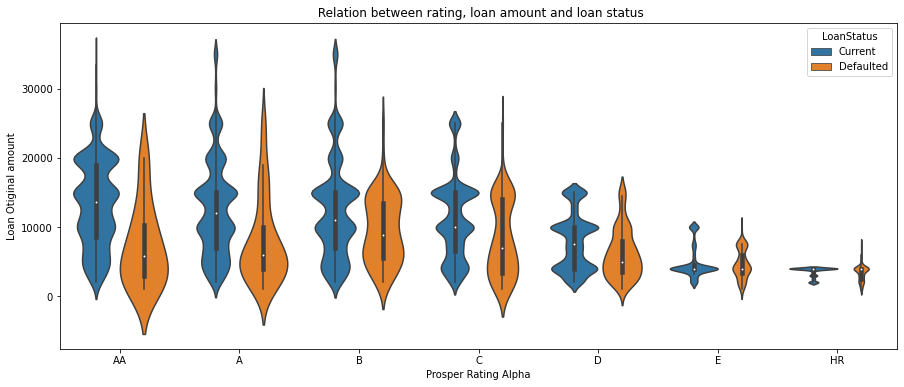

In [35]:
# We will take the loan status of interest which it was completed and defaulted
loan_category=df.query('LoanStatus=="Current" or LoanStatus== "Defaulted"')

plt.figure(figsize = [15, 6])

sb.violinplot(data= loan_category, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus', order= ord_list_alpha);
plt.title(' Relation between rating, loan amount and loan status');
plt.xlabel('Prosper Rating Alpha');
plt.ylabel('Loan Otiginal amount');


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - the lowest ratings defaulted credits tend to be larger than completed. 
> - defaulted credits tend to be smaller than completed
>
### Were there any interesting or surprising interactions between features?

> I realized  defaulted credits with high Prosper ratings tend to be larger than completed credits

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [26]:
#save Wrangled data to be use
df.to_csv('wrangling_data.csv',index=False)